<AxesSubplot:>

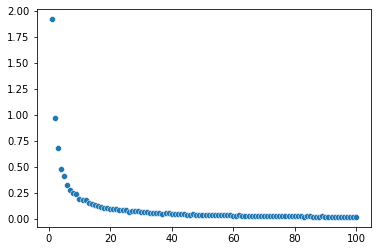

In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
np.random.seed = 42

n_samples = 1000
variance = np.zeros(100)
for i in range(1, 101):
    samples = np.random.randint(1, 6, size=(n_samples, i))
    mean = np.mean(samples, axis=1)
    variance[i-1] = np.var(mean)

sns.scatterplot(np.arange(1, 101), variance)

0.1104003194007885
0.10300870517650369
0.09933370231937494
0.09906710932203243
0.0919465460997001
0.09274701743685446
0.10203548367083665
0.09425858329830919
0.10739499115712442
0.10039143513727275


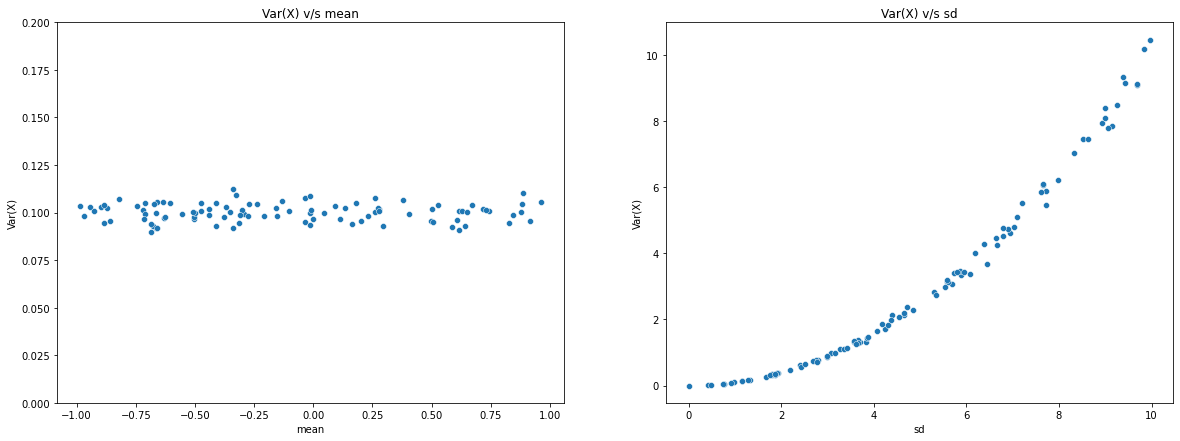

In [2]:
size = 100

variance_variable_mean = np.zeros(size+1)
variance_variable_sd = np.zeros(size+1)

var_mean_range = np.random.uniform(-1, 1, size+1)
var_sd_range = np.random.uniform(0, 10, size+1)

for id, i in enumerate(var_mean_range):
    # samples for variable mean and fixed sd
    samples_variable_mean = np.random.normal(loc=i, scale=1.0, size=(1000, 10))
    mean_variable_mean = np.mean(samples_variable_mean, axis=1)
    variance_variable_mean[id] = np.var(mean_variable_mean, )
    if id<10:
        print(variance_variable_mean[id])

for id, i in enumerate(var_sd_range):
    # samples for fixed mean and variable sd
    samples_variable_sd = np.random.normal(loc=0.0, scale=i, size=(1000, 10))
    mean_variable_sd = np.mean(samples_variable_sd, axis=1)
    variance_variable_sd[id] = np.var(mean_variable_sd)

fig, axs = plt.subplots(figsize=(20, 7), ncols=2)

sns.scatterplot(var_mean_range, variance_variable_mean, ax=axs[0])
axs[0].title.set_text('Var(X) v/s mean')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Var(X)')
axs[0].set_ylim((0.0, 0.2))

sns.scatterplot(var_sd_range, variance_variable_sd, ax=axs[1])
axs[1].title.set_text('Var(X) v/s sd')
axs[1].set_xlabel('sd')
axs[1].set_ylabel('Var(X)')

fig.show()

In [3]:
from scipy.stats import norm
from math import sqrt

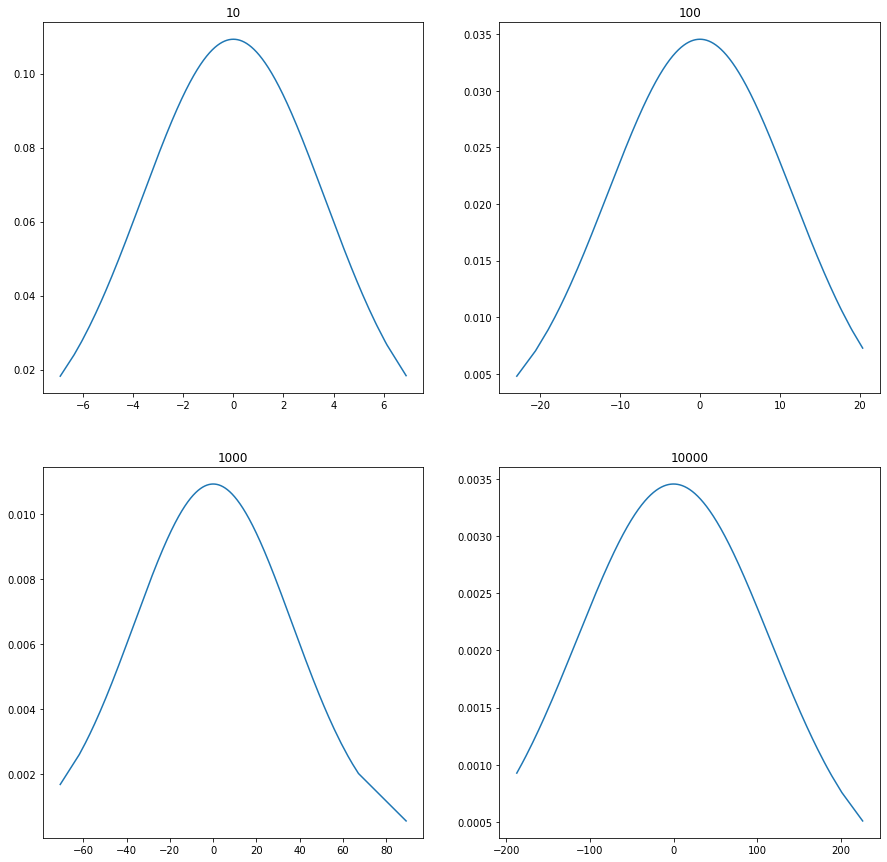

In [4]:
n = np.array([10, 100, 1000, 10000])
D_sum = np.empty(shape=(0, 0))

for size_idx in np.arange(n.shape[0]):
    D = np.random.uniform(-1, 1, size=(10000, n[size_idx]))
    if size_idx == 0:
        D_sum = np.sum(D, axis=1)
    else:
        D_sum = np.vstack([D_sum, np.sum(D, axis=1)])    

fig, axs = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
counter = 0
for i in np.arange(2):
    for j in np.arange(2):
        sns.lineplot(x=D_sum[counter,:], y=norm.pdf(D_sum[counter,:], (n[counter]*(-2+2)/2), (sqrt( ( (-2-2)**2)/12) )*sqrt(n[counter])), ax=axs[i, j])
        axs[i, j].set_title(f'{n[counter]}')
        counter += 1

# Chi Square test

### Using dice throw example (Discrete sample example)

#### We know that the population mean of dice throws will be:
### $\frac{\sum_{i=1}^6  i}{6}$
Hence, $\mu$ = 3.5

#### We also know that Standard Deviation will be:
### $\sqrt{\frac{\sum_{i=1}^6(x_i - \mu)}{6-1}}$
Hence, $\sigma$ = 1.707825127659933

In [5]:
pop_mean = 3.5
pop_std = 1.707825127659933
pop_var = pop_std**2

In [6]:
samples = np.random.randint(1, 6+1, size=(1000, 3))
print(samples[:10])
samples.shape

[[2 2 4]
 [2 2 1]
 [6 5 1]
 [6 2 3]
 [1 2 6]
 [3 4 6]
 [1 3 2]
 [2 1 1]
 [4 5 4]
 [5 1 1]]


(1000, 3)

In [7]:
sample_mean_dist = np.mean(samples, axis=1)
sample_var_dist = np.var(samples, axis=1)
sample_std_dist = sample_var_dist**0.5

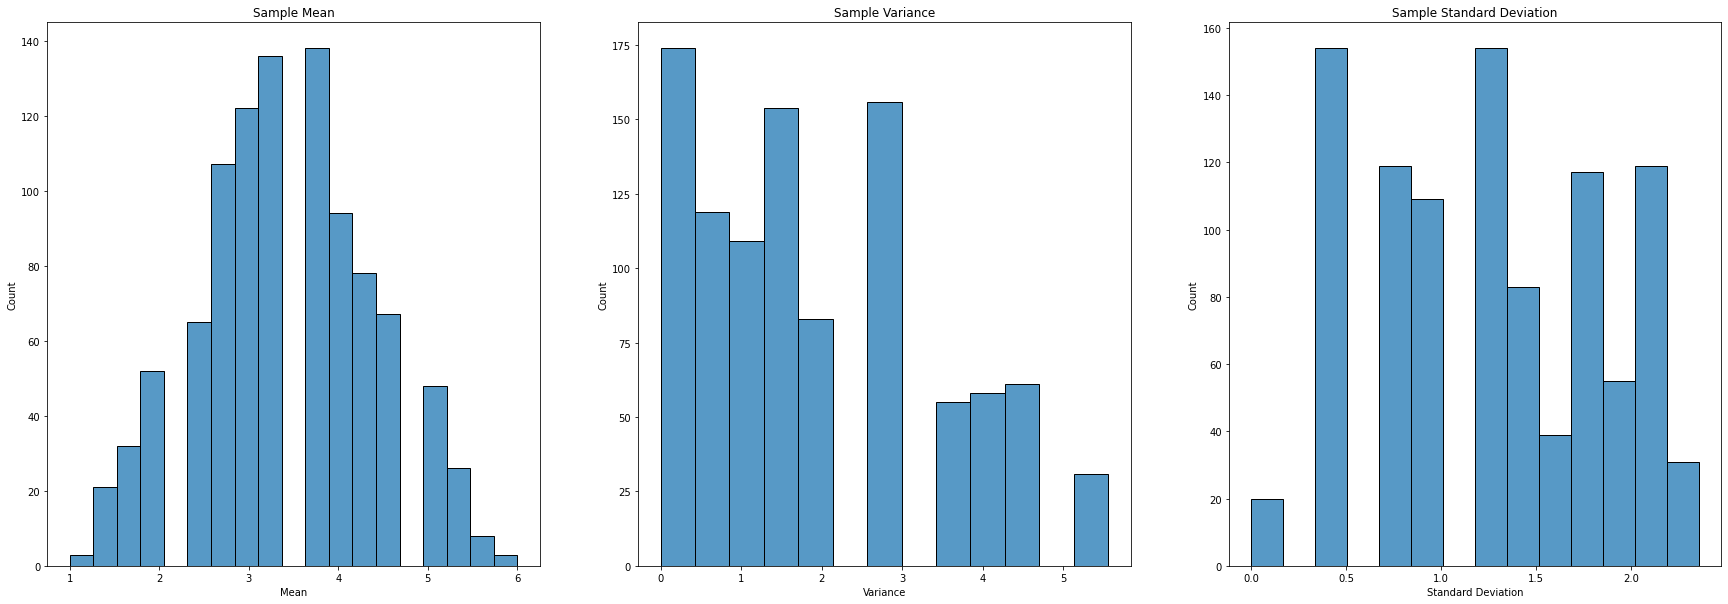

In [8]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=sample_mean_dist, ax=axs[0])
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=sample_var_dist, ax=axs[1])
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=sample_std_dist, ax=axs[2])
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

From *Central Limit Theorem*, we already knew that the sample means distribution will be a **Normal Distribution**
<br>Now, We have to gain insights about the ***sample variance distribution*** 
<br><br>
#### But, first lets see the whether the below given relation  holds or not: 
$E[S^2] = \sigma^2$

In [9]:
expected_sample_variance = np.mean(sample_var_dist)
expected_sample_variance

1.9553333333333334

In [10]:
pop_var

2.9166666666666665

Now, lets look at at the observations:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

<br>But,we cannot say for sure since we tried this using only 1000 samples.<br>Let's, try this using $10^6$ samples.

In [11]:
large_samples = np.random.randint(1, 6+1, size=(10**6, 3))
print(large_samples[:10])
large_samples.shape 

[[5 4 3]
 [5 6 5]
 [2 6 1]
 [6 4 5]
 [4 1 6]
 [1 5 5]
 [4 4 4]
 [1 3 6]
 [2 4 4]
 [4 3 2]]


(1000000, 3)

In [12]:
large_sample_mean_dist = np.mean(large_samples, axis=1)
large_sample_var_dist = np.var(large_samples, axis=1)
large_sample_std_dist = large_sample_var_dist**0.5

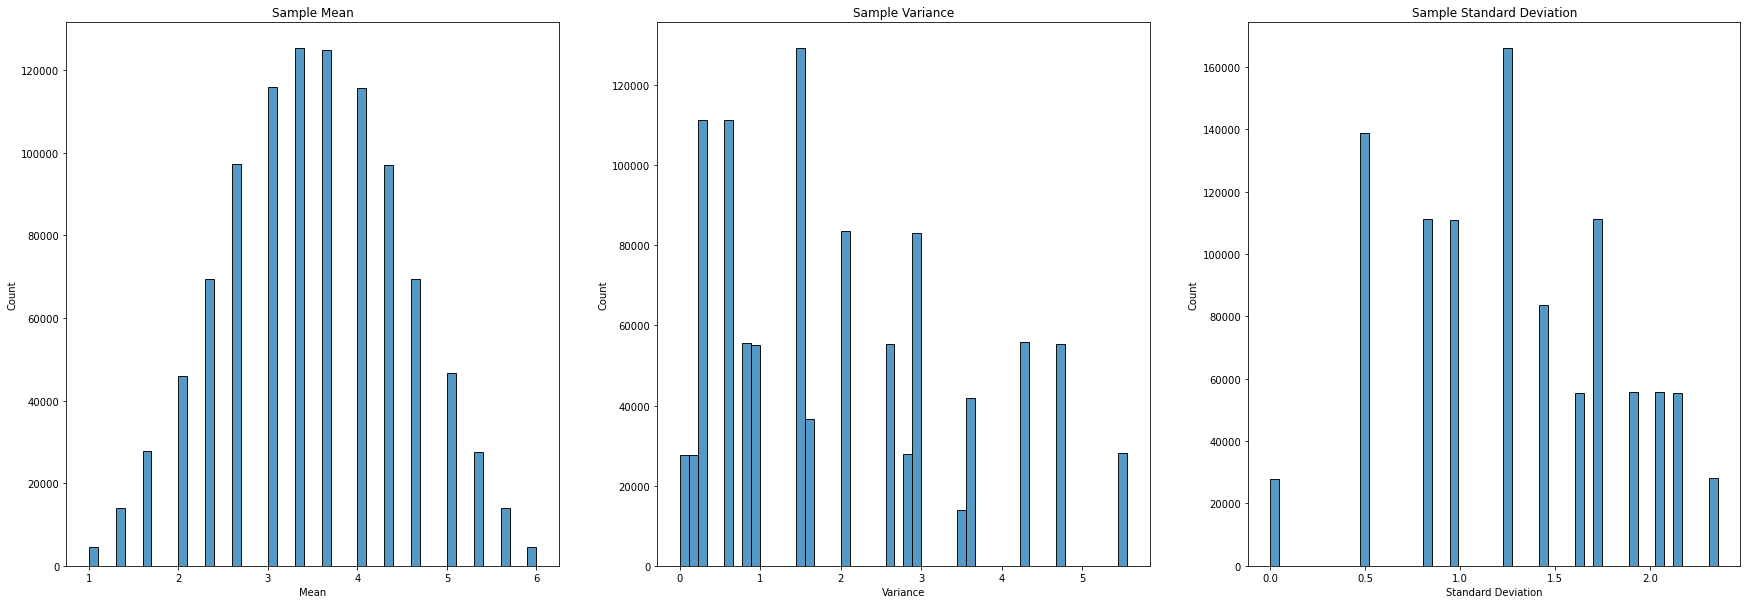

In [13]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=large_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=large_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=large_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

In [14]:
expected_large_sample_var = np.mean(large_sample_var_dist)
expected_large_sample_var

1.9459782222222224

As we can see, there is very slight change in $E(S^2)$. Hence, our previous observations stands true.
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

### Random samples from standard normal dist. (Continous sample example) 

Since, it is a standard normal distribution, we know that:
<br>
$\mu=0$
<br>
$\sigma=1$

In [15]:
norm_samples = np.random.normal(size=(10**6, 3))
print(norm_samples[:10])
norm_samples.shape

[[-1.45395517 -0.96311889 -1.71186961]
 [ 0.75311282 -1.95167857 -1.02791904]
 [-0.88382066  0.22360285  0.55162543]
 [ 0.38147151 -0.52190467  0.55458811]
 [-0.65088045  0.56400737 -0.3832623 ]
 [ 1.13537155 -1.20554044  0.33859775]
 [ 1.39641114  0.3956619   0.84598644]
 [-0.56569872  0.14963811  0.57812316]
 [ 0.56806118 -0.60256963  0.2045473 ]
 [-0.50463411 -1.29662981  0.47273462]]


(1000000, 3)

In [16]:
norm_sample_mean_dist = np.mean(norm_samples, axis=1)
norm_sample_var_dist = np.var(norm_samples, axis=1)
norm_sample_std_dist = norm_sample_var_dist**0.5

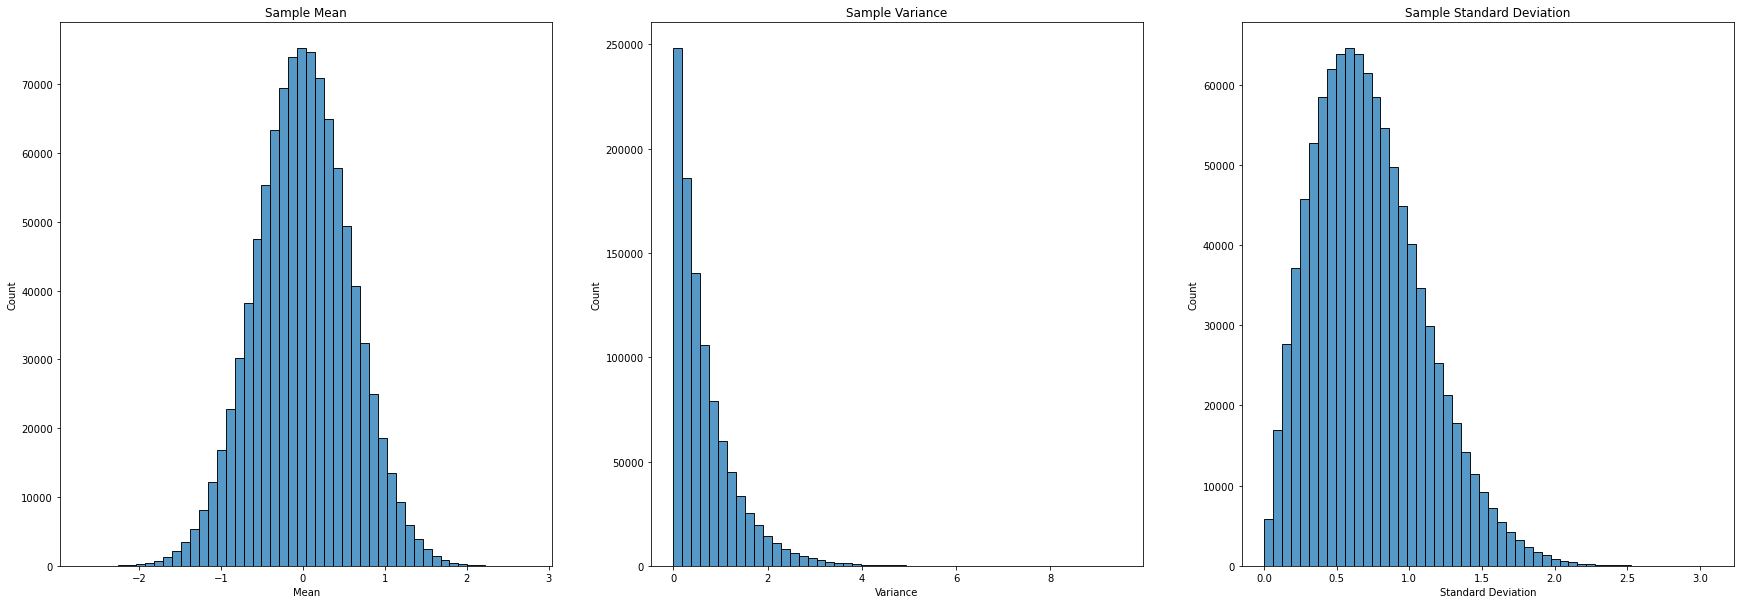

In [17]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=norm_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=norm_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance');
sns.histplot(x=norm_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');


In [18]:
expected_norm_sample_var = np.mean(norm_sample_var_dist)
expected_norm_sample_var

0.6664135803980952

#### Even while using normal distribution we can see that the oberservations made using samples containing discrete values hold true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$ 

### Now, lets play with two value:
* $n$ = sample size
* $\mu$ = population mean

We will plot a graph for each $v/s$ $E(S^2)$
<br>
and compare with $\sigma^2$

### For $n$:
* $\mu$ = 0
* $\sigma$ = 1

In [19]:
import pandas as pd

In [20]:
variable_n = np.arange(1, 50+1)
variable_n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [21]:
variable_n_expected_var_series = pd.Series(index=variable_n)

In [22]:
for n in variable_n:
    variable_n_samples = np.random.normal(size=(10**6, n))
    variable_n_var_dist = np.var(variable_n_samples, axis=1)
    variable_n_expected_var_series[n] = np.mean(variable_n_var_dist)

variable_n_expected_var_series.iloc[:5]

1    0.000000
2    0.499495
3    0.666664
4    0.750407
5    0.799637
dtype: float64

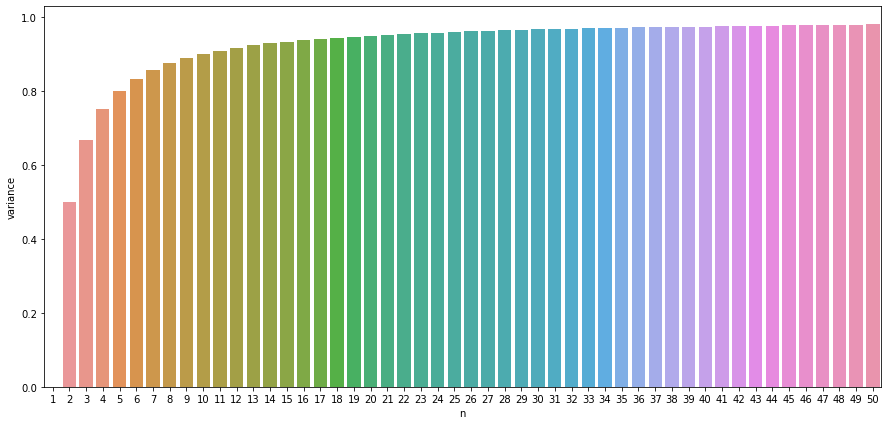

In [23]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_expected_var_series.values)
plt.xlabel('n')
plt.ylabel('variance');

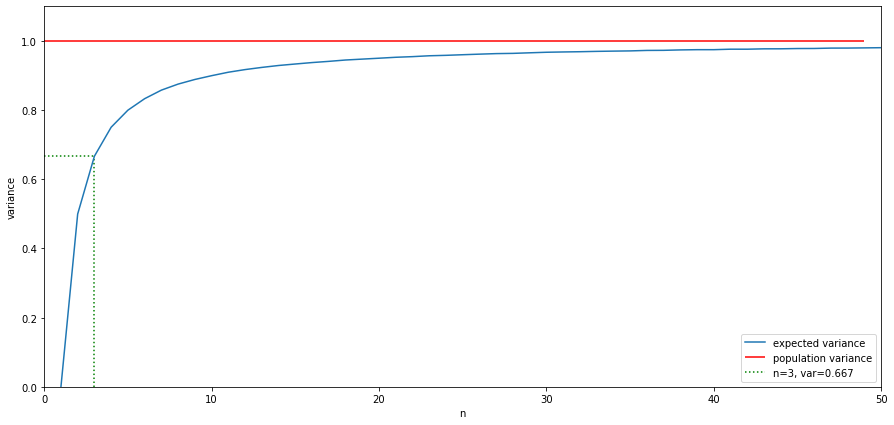

In [24]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.lineplot(x=variable_n, y=variable_n_expected_var_series.values, label='expected variance')
plt.hlines(xmin=0, xmax=49, y=1.0, colors='red', label='population variance')
plt.xlabel('n')
plt.ylabel('variance')
plt.hlines(xmin=0, xmax=3, y=variable_n_expected_var_series[3], colors='green', linestyles='dotted', label=f'n=3, var={variable_n_expected_var_series[3]:.3f}')
plt.vlines(ymin=0, ymax=variable_n_expected_var_series[3], x=3, colors='green', linestyles='dotted')
plt.xlim((0, 50))
plt.ylim((0, 1.1))
plt.legend(loc='lower right');

Look at the green dotted line, it represents n=3. We will be using it below, so remember it's variance (given in the legend).<br><br>
We can see that as we increase $n$, $E(S^2)$ is getting closer to $\sigma^2$ which is equal to 1. (but still $<$ $\sigma^2$)

### For $\mu$:
* $n$ = 3
* $\sigma$ = 1

In [25]:
n = 3

In [26]:
variable_mean = np.random.uniform(-10, 10+1, size=50)
variable_mean

array([ 3.98138354, -2.71115294,  7.84184196, -2.08482715, -6.81621611,
       -6.42084561, -1.15872053, -6.50015392,  1.69007224, -6.96728761,
        3.36523988,  5.45567134, -0.93714112, -8.1563181 , -7.48639673,
       -7.43610055, -8.43919214, -9.3229869 , -8.61047628,  3.29852855,
       -2.66766848, -4.79357177, -7.28574655, -3.59186118,  8.51257653,
       -3.86552598,  1.29330506, -8.51474128, -1.43819048, 10.01827816,
       -6.61329464, -8.88706528, -3.82032169,  0.11484675, 10.60330335,
       -3.46488013, -9.57032249, -3.64924378, -4.07479428,  2.66849365,
       -6.30101856, -3.44874396,  6.66089307, -5.81537681,  8.77265417,
       -6.74620006,  3.2802355 , 10.47598626, 10.64013136, -5.34810888])

In [27]:
variable_mean_expected_var_series = pd.Series(index=variable_mean)

In [28]:
for mean in variable_mean:
    variable_mean_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_var_dist = np.var(variable_mean_samples, axis=1)
    variable_mean_expected_var_series[mean] = np.mean(variable_mean_var_dist)

variable_mean_expected_var_series.iloc[:5]

 3.981384    0.667047
-2.711153    0.666367
 7.841842    0.667266
-2.084827    0.666025
-6.816216    0.667341
dtype: float64

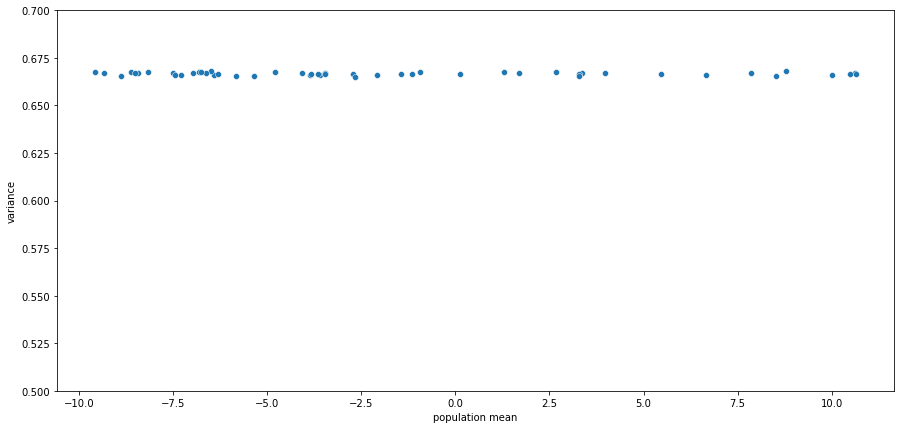

In [29]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=variable_mean, y=variable_mean_expected_var_series.values)
plt.xlabel('population mean')
plt.ylabel('variance')
plt.ylim((0.5, 0.7));

The scatterplot for all  $\mu$ is showing approx. 1, so $\mu$ does not affect $E(S^2)$.
<br>
Let's zoom in on the data using lineplot.

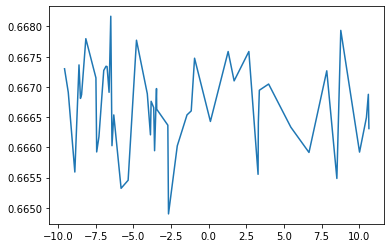

In [30]:
sns.lineplot(x=variable_mean, y=variable_mean_expected_var_series.values);

We can see from the lineplot that value of $E(S^2)$ lies in the very small interval (look at y-axis), which is a little far from 1.


### Conclusions from above two plots:

* As $n$ &#8594; $\infty$ $,$ $E(S^2)$ &#8594; 1
* $\mu$ has no effect on $E(S^2)$

### Also the two observations given below from the previous experiments stand true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$   $(This$ $one$ $is$ $particularly$ $important)$

## NOW, what if I told you that the variance we have been using till now contains bias!!

You heard it right, and the reason $E(S^2)$ is under-estimating (always having lower value than) $\sigma^2$ is that ***bias***. 

Let's look at the reason, we will look at two reasons:
* Geometric reasoning
* Algebraic reasoning

* <h3>Geometric reasoning:</h3>


$E[S^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}]$ <br><br>
$\sigma^2$ = $E[\frac{\sum_{i=1}^n (X_i - \mu)^2}{n}]$

Now, let's look at few examples:

### Example-1:<br><br>
We have population of containing $6$ numbers - 1, 2, 3, 4, 5, 6.<br> Now, we take a sample containing $3$ numbers - 1, 3, 4
<br><br> $\mu$ and $\bar{X}$ have been shown in the figure below.

<img src="../images/eg1.png"></img>

Now, let's recall the formulas of $\mu$ and $E[S^2]$.
* $\sigma$ is calculated by taking into account the distance between $X_i$ and $\mu$.
* $E[S^2]$ is calculated by taking into account the distance between $X_i$ and $\bar{X}$.

From the above given figure we can see that:
 * $\sum_{i=1}^n (X_i - \mu)$ will be greater than $\sum_{i=1}^n (X_i - \bar{X})$, this happens because $\mu$ is the population mean. Hence it is calculated<br>by taking into account even the end points of the entire population where as, $\bar{X}$ is only the mean of only the points contained <br>
 in that particular sample.
 <br><br><br>

### Example-2:<br><br>

<img src='../images/eg2.png'></img>

Here, $\bar{X}$ and $\mu$ are approximately the same. Hence, if we calculate $E[S^2]$, then we will see that it is close to $\sigma^2$.
<br><br><br>
Hence, by looking at the two examples, we can say that:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Average distance of samples from $\bar{X}$ $\le$ Average distance of samples from $\mu$***
<br><br><br>
### As a result, $E[S^2]$ $<$ $\sigma^2$<br>
I know you might be thinking where did $=$ go, when average distances can be equal why not $E[S^2]$ and $\sigma^2$ too. The reasoning will be<br>
provided at the end of this section. 

* <h3>Algebraic Reasoning:</h3>

Now, the only factor that can help us in understanding why $E[S^2]$ always underestimates $\sigma^2$ is the $\sum_{i=1}^n$ term in both the equations<br><br>
Let's start with $\sum_{i=1}^n (X_i - \mu)^2$ and try to get its expression in terms of $\sum_{i=1}^n (X_i - \bar{X})^2$.

$\sum_{i=1}^n (X_i - \mu)^2$ = $\sum_{i=1}^n ((X_i - \bar{X}) + (\bar{X} - \mu))^2$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\sum_{i=1}^n ((X_i - \bar{X})^2 + (\bar{X} - \mu)^2 + 2(X_i - \bar{X})(X_i - \mu))$   ,where, $\sum_{i=1}^n (X_i - \bar{X}) = 0$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\sum_{i=1}^n (X_i - \bar{X})^2 + \sum_{i=1}^n (\bar{X} - \mu)^2$

From the above calculation we can clearly see that, $\sum_{i=1}^n (X_i - \mu)^2 > \sum_{i=1}^n (X_i - \bar{X})^2$ <br><br>
Hence, $E[S^2]$ always underestimates $\sigma^2$

## Estimating $E[S^2]$: 
### Let's make an attempt to represent $E[S^2]$ in terms of $\sigma^2, n, \mu$.

We will start by finding the expected value of error:<br><br>
$E[\sigma^2 - S^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \mu)^2}{n} - \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\frac{1}{n}(\sum_{i=1}^n (X_i - \mu)^2 - \sum_{i=1}^n (X_i - \bar{X})^2)]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\frac{1}{n}\sum_{i=1}^n (X_i - \mu)^2 - (X_i - \bar{X})^2]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + \frac{1}{n}\sum_{i=1}^n 2X_i(\bar{X} - \mu)]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + \frac{2(\bar{X} - \mu)}{n}\sum_{i=1}^n X_i]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + 2(\bar{X} - \mu)\bar{X}]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 + \bar{X}^2 - 2\bar{X}\mu]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[(\bar{X} - \mu)^2]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\frac{\sigma^2}{n}$<br><br>
<br>
Now, since $\sigma^2$ is a constant, we write $E[\sigma^2 - S^2]$ = $\sigma^2 - E[S^2]$<br><br>
Hence, $E[S^2]$ = $\sigma^2$ - $\frac{\sigma^2}{n}$<br><br>
When we simplify the equation, we get:<br><br>
### $E[S^2]$ = $\frac{n-1}{n}\sigma^2$ &#8594; Now, we see why we didn't put = sign in $E[S^2]$ $<$ $\sigma^2$<br><br>
<br>Now, coming to out main topic ***Bias***:<br><br>
As we can, $E[S^2]$ is always less than $\sigma^2$, it is not sometimes greater or less than, but always less than. So, this systematic error is known as ***bias***.<br><br>

Inorder to remove this bias, we define an **unbiased** variance $E[S_{n-1}^2]$<br><br>
$E[S_{n-1}^2]$ = $\sigma^2$, (Let's call this **$eq.1$** for sometime) and <br><br>
to distinguish the usual **biased** variance, we denote it as $E[S_{n}^2]$<br><br>
$E[S_n^2]$ = $\frac{n-1}{n}\sigma^2$ (Let's call this **$eq.2$** for sometime)<br><br><br>
We know:<br><br>
$S_{n}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$, so using $eq.1$ & $eq.2$ (just recall properties of expectation)<br><br>
$E[S_{n-1}^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}]$ and $S_{n-1}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$<br><br><br>
* **Remember, the experiment where we plotted a graph between $E[S^2]$ and $n$, and I told you to note down the value for n=3. Now, put the value of n=3 in $eq.2$ and you will understand why we got that graph.**

### Now, that we have two type variances - $S_n^2$ and $S_{n-1}^2$, when to use which?<br><br>
### Answer: <br>
* When we want to calculate **$Population$ $Variance$**, then we will use **$S_n^2$**.
* When we want to calculate **$Sample$ $Variance$**, then we will use **$S_{n-1}^2$**.

Now, let's go to our example were everthing started:

### For $n$:

In [31]:
variable_n_unbiased_expected_var_series = pd.Series(index=variable_n)

In [32]:
for n in variable_n:
    variable_n_unbiased_samples = np.random.normal(size=(10**6, n))
    variable_n_unbiased_var_dist = np.var(variable_n_unbiased_samples, axis=1, ddof=1)      # ddof=1 tells numpy to calculate sample variance
    variable_n_unbiased_expected_var_series[n] = np.mean(variable_n_unbiased_var_dist)

variable_n_unbiased_expected_var_series.iloc[:5]

1         NaN
2    0.997223
3    1.000885
4    0.998703
5    1.000951
dtype: float64

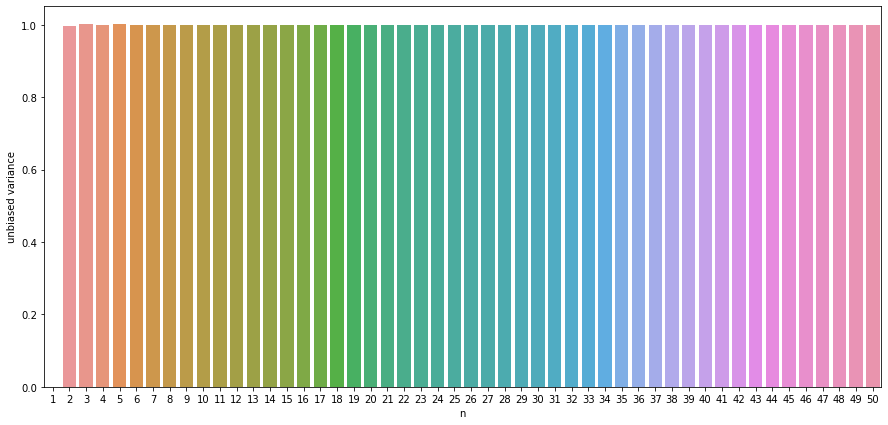

In [33]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_unbiased_expected_var_series.values)
plt.xlabel('n')
plt.ylabel('unbiased variance');

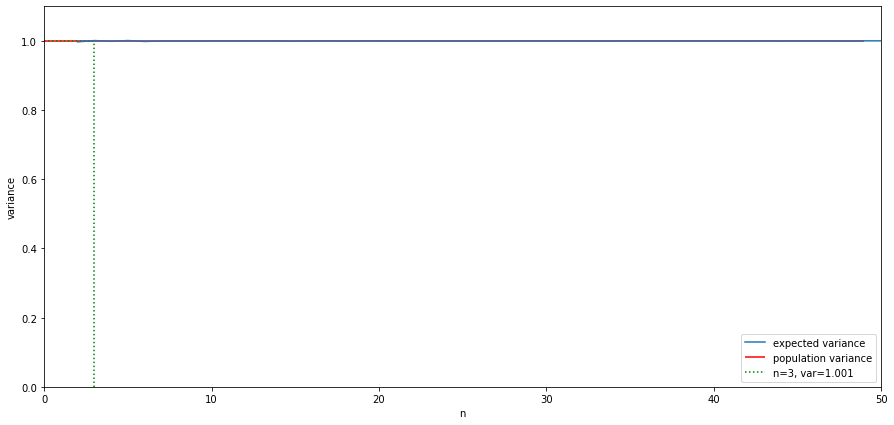

In [34]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.lineplot(x=variable_n, y=variable_n_unbiased_expected_var_series.values, label='expected variance')
plt.hlines(xmin=0, xmax=49, y=1.0, colors='red', label='population variance')
plt.xlabel('n')
plt.ylabel('variance')
plt.hlines(xmin=0, xmax=3, y=variable_n_unbiased_expected_var_series[3], colors='green', linestyles='dotted', label=f'n=3, var={variable_n_unbiased_expected_var_series[3]:.3f}')
plt.vlines(ymin=0, ymax=variable_n_unbiased_expected_var_series[3], x=3, colors='green', linestyles='dotted')
plt.xlim((0, 50))
plt.ylim((0, 1.1))
plt.legend(loc='lower right');

### For $\mu$:

In [35]:
variable_mean_unbiased_expected_var_series = pd.Series(index=variable_mean)

In [36]:
for mean in variable_mean:
    variable_mean_unbiased_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_unbiased_var_dist = np.var(variable_mean_unbiased_samples, axis=1, ddof=1)
    variable_mean_unbiased_expected_var_series[mean] = np.mean(variable_mean_unbiased_var_dist)

variable_mean_unbiased_expected_var_series.iloc[:5]

 3.981384    0.999662
-2.711153    1.000300
 7.841842    1.000150
-2.084827    0.999679
-6.816216    1.000103
dtype: float64

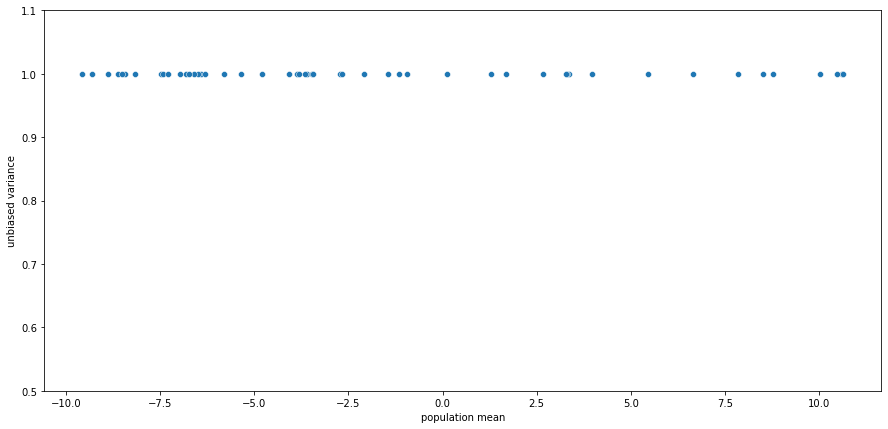

In [37]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=variable_mean, y=variable_mean_unbiased_expected_var_series.values)
plt.xlabel('population mean')
plt.ylabel('unbiased variance')
plt.ylim((0.5, 1.1));

### *This time we can see that for all the graphs, the output is correct. (extremely close to population variance)* <br><br>
* For $variable$ $n$ and $\mu$, the output is a straight line $y$ = $1$ (approx.)

## ***Conclusion***:
* $E(S_n^2)$ & $E(S_{n-1}^2)$ are biased and unbiased estimates of $\sigma^2$ respectively.<br><br>
* If we want to calculate $\sigma^2$ (population variance), use $S_{n}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$<br><br>
* If we want to calculate $E[S^2]$ (expected sample variance), use $S_{n-1}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$

In [48]:
q_dist = np.empty(shape=(variable_n.shape[0], 10**5))

for id, i in enumerate(variable_n):
    z_samples = np.array([np.random.normal(size=10**5) for j in np.arange(i)])
    q_dist[id] = np.sum(z_samples**2, axis=0)

sns.histplot(q_dist, bins=100)

ValueError: setting an array element with a sequence.